# 📊 Análisis de Casos de Atención

Objetivo: Identificar patrones en cancelaciones, escalaciones y eficiencia de resolución por canal.

In [39]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Carga de datos
casos = pd.read_csv('casos.csv')
asesores_casos = pd.read_csv('asesores_casos.csv')
seguimiento_casos = pd.read_csv('seguimiento_casos.csv')

## 🧹 Preparación de datos
Se convierten las columnas de fecha a formato datetime para poder calcular duraciones.

In [3]:
casos['fecha_creacion'] = pd.to_datetime(casos['fecha_creacion'])
seguimiento_casos['fecha_inicio'] = pd.to_datetime(seguimiento_casos['fecha_inicio'])
seguimiento_casos['fecha_fin'] = pd.to_datetime(seguimiento_casos['fecha_fin'])

## 🔗 Integración de información
Se combinan las tablas para obtener una vista completa del ciclo de vida del caso.

In [4]:
df = casos.merge(seguimiento_casos, on='caso_id')
tabla_fin = df.merge(asesores_casos, on='asesor_id')

## ❌ Cancelaciones
Se analizan las ciudades y prioridades donde más casos se cancelan.

In [7]:
cancelacion = tabla_fin[tabla_fin['resultado'] == "Se cancela"]

can_ciudad = cancelacion['ciudad'].value_counts().reset_index()
can_ciudad.columns = ['Ciudad', 'Casos cancelados']
print(can_ciudad)

        Ciudad  Casos cancelados
0         CDMX               122
1  Guadalajara               119
2    Monterrey               107


<Axes: title={'center': 'Cancelaciones por Ciudad'}, xlabel='Ciudad'>

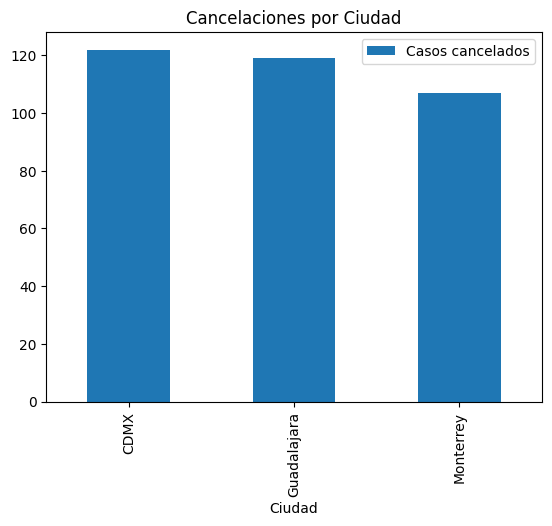

In [31]:
can_ciudad.plot(kind='bar', x='Ciudad', y='Casos cancelados', title='Cancelaciones por Ciudad')

In [27]:
can_prioridad = cancelacion['prioridad'].value_counts().reset_index()
can_prioridad.columns = ['Prioridad', 'Casos']
can_prioridad

,Prioridad,Casos
0,Media,121
1,Baja,118
2,Alta,109


💡 **Insight:** CDMX concentra el mayor número de cancelaciones,
lo que podría reflejar una mayor carga operativa o fricción en la atención.

Asimismo, los casos con prioridad media presentan la mayor proporción de cancelaciones,
lo que sugiere posibles oportunidades de mejora en la gestión preventiva
de este tipo de solicitudes.

## 📈 Escalaciones
Identificamos qué tipo de casos requieren mayor intervención.

In [9]:
escalacion = tabla_fin[tabla_fin['etapa'] == "Escalado"]
tipo_escalacion = escalacion['tipo_caso'].value_counts().reset_index()
tipo_escalacion.columns = ['Tipo de casos', 'Casos escalados']
print( tipo_escalacion)

  Tipo de casos  Casos escalados
0   Facturación              137
1   Cancelación              133
2       Técnico              126


💡 **Insight:** Los casos relacionados con facturación y cancelación presentan mayor tendencia a escalar, lo que podría indicar mayor complejidad en su resolución o necesidad de intervención especializada.

## 🏆 Eficiencia por equipo

In [20]:
resuelto = tabla_fin[tabla_fin['etapa'] == "Resuelto"]
eq_resuelto = resuelto['equipo'].value_counts().reset_index()
eq_resuelto.columns = ['Equipo', 'Casos resueltos']
print(eq_resuelto)

          Equipo  Casos resueltos
0  Especializado              154
1      Frontline               98


💡 **Insight:** El equipo especializado concentra la mayor proporción de casos resueltos, lo que evidencia su impacto en la resolución de situaciones complejas.

## ⏱️ Tiempo de resolución
Se calcula la duración entre inicio y fin del caso.

In [40]:
tabla_fin['duracion'] = (tabla_fin['fecha_fin'] - tabla_fin['fecha_inicio'] ).dt.days

## 📞 Eficiencia por canal
Analizamos el tiempo promedio que tarda cada canal en resolver casos.

In [23]:
resueltos = tabla_fin[tabla_fin['etapa'] == "Resuelto"]

tiempo_promedio_canal = resueltos.groupby('canal')['duracion'].mean().sort_values(ascending=False).to_frame(name='Tiempo Promedio (días)')
tiempo_promedio_canal

,Tiempo Promedio (días)
canal,
Teléfono,2.518519
Email,2.478261
Chat,2.291139


<Axes: title={'center': 'Tiempo Promedio de Resolución por Canal'}, xlabel='canal'>

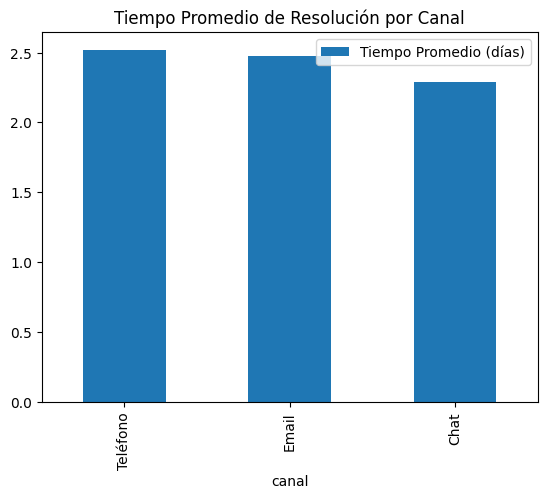

In [35]:
tiempo_promedio_canal.plot(kind='bar', title='Tiempo Promedio de Resolución por Canal')

💡 **Insight:** El canal Teléfono presenta el mayor tiempo promedio de resolución, mientras que Chat muestra el menor tiempo, posicionándose como el canal más ágil para la atención de casos.

## 🔄 Duración por etapa del proceso

In [37]:
duracion_etapa = tabla_fin.groupby('etapa')['duracion'].mean().sort_values(ascending=False).to_frame(name='Tiempo Promedio')
duracion_etapa

,Tiempo Promedio
etapa,
Asignado,4.013333
En proceso,3.983539
Escalado,3.959596
Resuelto,2.432540
Cerrado,2.081818


<Axes: title={'center': 'Duración Promedio por Etapa'}, xlabel='etapa'>

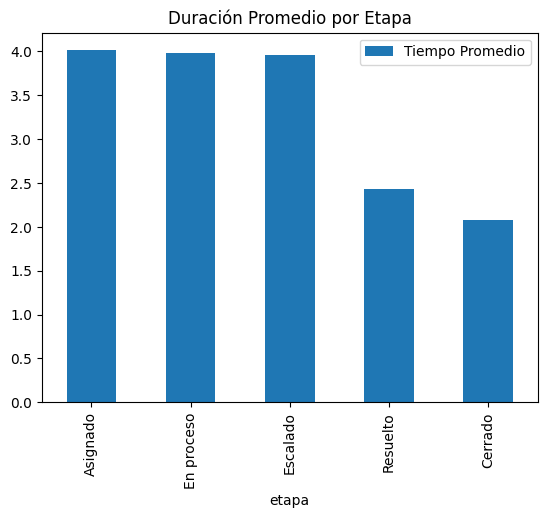

In [38]:
duracion_etapa.plot(kind='bar', title='Duración Promedio por Etapa')

💡 **Insight:** Las etapas iniciales del flujo operativo concentran mayores tiempos de permanencia, lo que sugiere posibles oportunidades de optimización en la asignación y gestión temprana de los casos.